# CIFAR-10을 사용한 CNN 모델 구현 및 비교

이번에는 CIFAR-10 데이터셋을 사용하여 이미지 분류 모델을 구현해보겠습니다.

먼저 TensorFlow와 Keras를 사용하여 모델을 구축하고, 이후에 PyTorch를 사용하여 동일한 작업을 수행한 뒤 결과를 비교해보겠습니다.

## 1. CIFAR-10 데이터셋 소개

- CIFAR-10은 10개의 클래스로 구분된 32x32 크기의 컬러 이미지로 구성된 데이터셋입니다.
- 총 60,000개의 이미지로 이루어져 있으며, 50,000개의 훈련 데이터와 10,000개의 테스트 데이터로 구성되어 있습니다.

- 클래스는 다음과 같습니다
    - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

- CIFAR-10은 MNIST보다 데이터의 복잡도가 높아 단순한 신경망으로는 특징을 추출하기 어렵습니다.


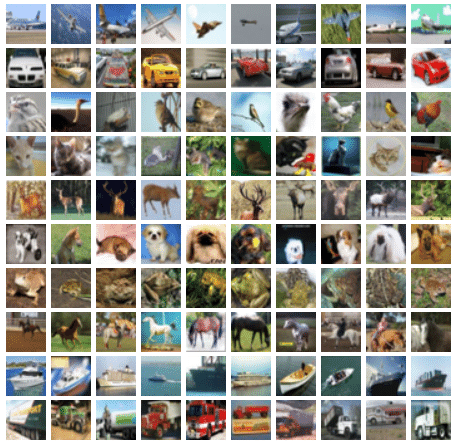

## 2. TensorFlow와 Keras를 사용한 모델 구현

### 필요한 라이브러리 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

### 데이터 로드 및 전처리

In [ ]:
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 데이터 형태 확인
print("훈련 데이터 셋:", x_train_full.shape, y_train_full.shape)
print("테스트 데이터 셋:", x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
훈련 데이터 셋: (50000, 32, 32, 3) (50000, 1)
테스트 데이터 셋: (10000, 32, 32, 3) (10000, 1)


### 데이터 시각화

<ipython-input-3-0f7fb756ad55>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train_full[idx])])


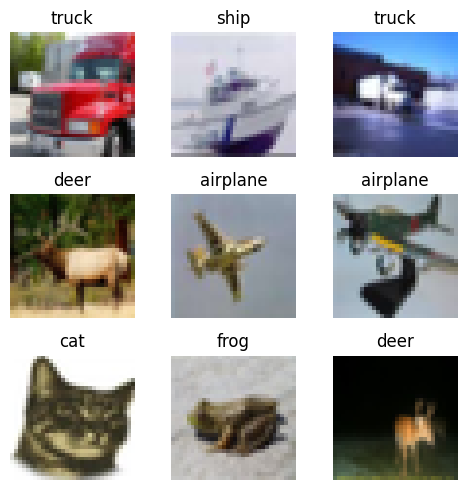

In [ ]:
# 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 랜덤한 9개의 이미지 선택
random_idx = np.random.randint(50000, size=9)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train_full[idx])
    plt.title(class_names[int(y_train_full[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()

- CIFAR-10 데이터셋에서 랜덤하게 9개의 이미지를 선택하여 시각화합니다.
- 각 이미지의 제목으로 해당 클래스 이름을 표시합니다.

### 데이터 정규화

- CIFAR-10 데이터는 픽셀 값이 0~255 사이의 정수로 구성되어 있습니다.
- 각 채널에 대해 평균과 표준편차를 계산하여 정규화합니다.

In [ ]:
# 평균과 표준편차 계산
x_mean = np.mean(x_train_full, axis=(0, 1, 2, 3))
x_std = np.std(x_train_full, axis=(0, 1, 2, 3))

# 데이터 정규화
x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

- 전체 훈련 데이터의 평균과 표준편차를 계산합니다.
- 훈련 데이터와 테스트 데이터를 정규화합니다.

### 훈련 데이터와 검증 데이터 분할


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

print("훈련 데이터:", x_train.shape, y_train.shape)
print("검증 데이터:", x_val.shape, y_val.shape)

훈련 데이터: (40000, 32, 32, 3) (40000, 1)
검증 데이터: (10000, 32, 32, 3) (10000, 1)


- train_test_split 함수를 사용하여 훈련 데이터의 20%를 검증 데이터로 분할합니다.
- random_state를 지정하여 결과를 재현 가능하게 합니다.

### 2.1 간단한 모델 구성 및 학습

In [ ]:
def build_model():
    input_layer = Input(shape=(32, 32, 3))

    x = Conv2D(filters=32, kernel_size=3, padding='same',
               activation='relu')(input_layer)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same',
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same',
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

    x = Flatten()(x)

    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,978 (2.49 MB)

 Trainable params: 651,978 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

- Conv2D 레이어를 사용하여 특징을 추출합니다.
- MaxPooling2D 레이어를 사용하여 공간 차원을 줄입니다.
- Flatten 레이어를 사용하여 1차원으로 펼칩니다.
- Dense 레이어를 사용하여 분류를 수행합니다.
- sparse_categorical_crossentropy 손실 함수를 사용하여 다중 클래스 분류를 수행합니다.

### 모델 학습


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.2740 - loss: 2.0297 - val_accuracy: 0.4370 - val_loss: 1.5565
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4506 - loss: 1.5258 - val_accuracy: 0.5017 - val_loss: 1.3949
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5107 - loss: 1.3751 - val_accuracy: 0.5322 - val_loss: 1.3097
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5412 - loss: 1.2892 - val_accuracy: 0.5558 - val_loss: 1.2637
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5673 - loss: 1.2206 - val_accuracy: 0.5620 - val_loss: 1.2242
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5857 - loss: 1.1712 - val_accuracy: 0.5891 - val_loss: 1.1634
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6063 - loss: 1.1158 - val_accuracy: 0.5901 - val_loss: 1.1591
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6204 - loss: 1.0847 - val_accuracy: 

- epochs: 학습을 30번 반복합니다.
- batch_size: 한 번의 배치에 256개의 샘플을 사용합니다.
- validation_data: 검증 데이터로 성능을 평가합니다.

### 학습 결과 시각화

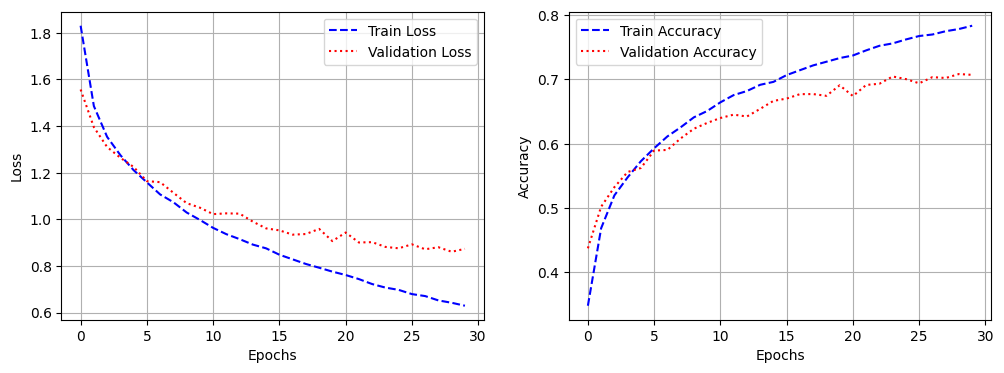

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

- 학습 과정에서의 손실과 정확도를 시각화하여 모델의 성능을 확인합니다.

### 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7064 - loss: 0.8737
테스트 정확도: 70.32%


- 테스트 데이터로 모델의 성능을 최종 평가합니다.

### 2.2 모델 구성 및 학습: 과대적합 방지

- 이전 모델은 성능이 충분하지 않으며, **과대적합(overfitting)**의 위험이 있습니다.
- **드롭아웃(Dropout)**과 **배치 정규화(Batch Normalization)**를 사용하여 과대적합을 방지합니다.

In [ ]:
def build_model_with_regularization():
    input_layer = Input(shape=(32, 32, 3))

    x = Conv2D(filters=32, kernel_size=3, padding='same',
               activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32, kernel_size=3, padding='valid',
               activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same',
               activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=3, padding='valid',
               activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same',
               activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=128, kernel_size=3, padding='valid',
               activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_reg = build_model_with_regularization()
model_reg.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,8

 Total params: 453,418 (1.73 MB)

 Trainable params: 452,970 (1.73 MB)

 Non-trainable params: 448 (1.75 KB)

- BatchNormalization 레이어를 사용하여 학습 속도를 높이고 안정성을 향상시킵니다.
- Dropout 레이어를 사용하여 과대적합을 방지합니다.


### 모델 학습

In [ ]:
history_reg = model_reg.fit(x_train, y_train,
                            epochs=100,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.1111 - loss: 3.8378 - val_accuracy: 0.1030 - val_loss: 2.3110
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1617 - loss: 2.3456 - val_accuracy: 0.1030 - val_loss: 2.3581
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1943 - loss: 2.1951 - val_accuracy: 0.1030 - val_loss: 2.4087
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2178 - loss: 2.1090 - val_accuracy: 0.1066 - val_loss: 2.3836
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2450 - loss: 2.0345 - val_accuracy: 0.1157 - val_loss: 2.3049
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2642 - loss: 1.9751 - val_accuracy: 0.1267 - val_loss: 2.2539
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2865 - loss: 1.9228 - val_accuracy: 0.1459 - val_loss: 2.2138
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3127 - loss: 1.8548 - val_accuracy: 

- 학습 에포크 수를 늘리고 배치 크기를 조정하여 모델의 성능을 향상시킵니다.

### 학습 결과 시각화

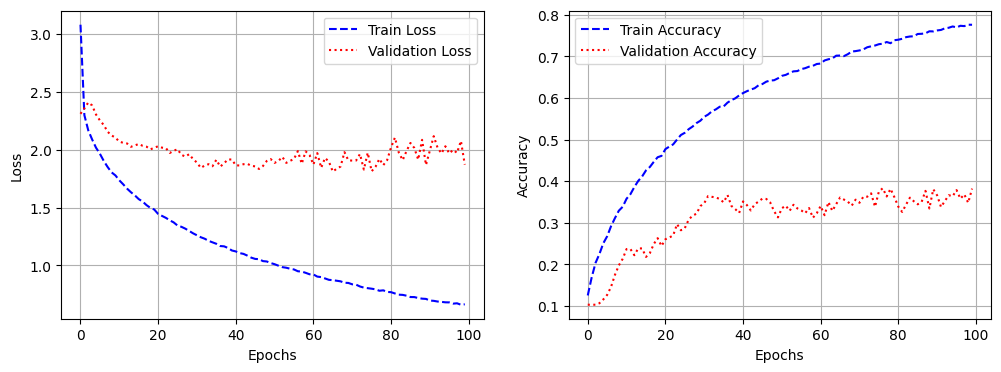

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], 'b--', label='Train Loss')
plt.plot(history_reg.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_reg.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(history_reg.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [ ]:
test_loss_reg, test_acc_reg = model_reg.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc_reg * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3909 - loss: 1.8605
테스트 정확도: 38.51%


## 3. PyTorch를 사용한 모델 구현


### 필요한 라이브러리 import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

### 데이터 로드 및 전처리

In [ ]:
# 데이터 정규화 및 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])

- CIFAR-10 데이터셋의 평균과 표준편차를 사용하여 정규화합니다.


In [ ]:
# 훈련 데이터셋
train_dataset_full = datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)

# 훈련 데이터와 검증 데이터로 분할
train_size = int(0.8 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size
train_dataset, val_dataset = random_split(train_dataset_full,
                                          [train_size, val_size])

# 테스트 데이터셋
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                download=True, transform=transform)

100%|██████████| 170M/170M [00:13<00:00, 12.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 데이터 로더 정의

In [ ]:
batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size,
                        shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False)

### 데이터 시각화

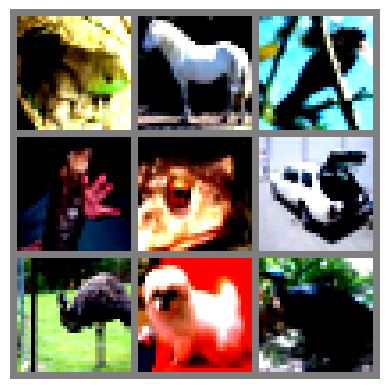

레이블:  frog horse  bird   cat  frog automobile  bird   dog  bird


In [ ]:
import torchvision

# 클래스 이름 정의
class_names = train_dataset_full.classes

# 첫 번째 배치 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 시각화 함수
def imshow(img):
    img = img / 2 + 0.5  # 정규화 역변환
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# 샘플 이미지 시각화
imshow(torchvision.utils.make_grid(images[:9], nrow=3))
print('레이블:', ' '.join('%5s' % class_names[labels[j]] for j in range(9)))

- torchvision.utils.make_grid 함수를 사용하여 여러 이미지를 하나로 결합하여 시각화합니다.


### 3.1 간단한 모델 구성 및 학습


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 32x32x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # 16x16x32

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # 16x16x64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # 8x8x64

            nn.Conv2d(64, 128, kernel_size=3, padding=1),# 8x8x128
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)        # 4x4x128
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4*4*128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleCNN()
print(model)


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)


### 모델 학습

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 학습 설정
epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(1, epochs+1):
    # 훈련 모드
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)

    # 검증 모드
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

Epoch [1/30], Train Loss: 1.9814, Val Loss: 1.7608, Train Acc: 29.07%, Val Acc: 37.01%
Epoch [2/30], Train Loss: 1.6545, Val Loss: 1.5598, Train Acc: 40.64%, Val Acc: 44.26%
Epoch [3/30], Train Loss: 1.5095, Val Loss: 1.4717, Train Acc: 45.43%, Val Acc: 46.77%
Epoch [4/30], Train Loss: 1.4291, Val Loss: 1.4029, Train Acc: 48.56%, Val Acc: 49.81%
Epoch [5/30], Train Loss: 1.3794, Val Loss: 1.3639, Train Acc: 50.37%, Val Acc: 50.98%
Epoch [6/30], Train Loss: 1.3307, Val Loss: 1.3264, Train Acc: 51.91%, Val Acc: 52.52%
Epoch [7/30], Train Loss: 1.2912, Val Loss: 1.2944, Train Acc: 53.59%, Val Acc: 53.65%
Epoch [8/30], Train Loss: 1.2559, Val Loss: 1.2536, Train Acc: 54.93%, Val Acc: 55.51%
Epoch [9/30], Train Loss: 1.2220, Val Loss: 1.2404, Train Acc: 56.44%, Val Acc: 56.25%
Epoch [10/30], Train Loss: 1.1868, Val Loss: 1.2227, Train Acc: 57.73%, Val Acc: 56.28%
Epoch [11/30], Train Loss: 1.1550, Val Loss: 1.1773, Train Acc: 58.94%, Val Acc: 58.38%
Epoch [12/30], Train Loss: 1.1248, Val Lo

- model.train(): 모델을 학습 모드로 전환합니다.
- model.eval(): 모델을 평가 모드로 전환합니다.
- torch.no_grad(): 평가 시에는 기울기 계산을 비활성화하여 메모리 사용을 줄입니다.


### 학습 결과 시각화

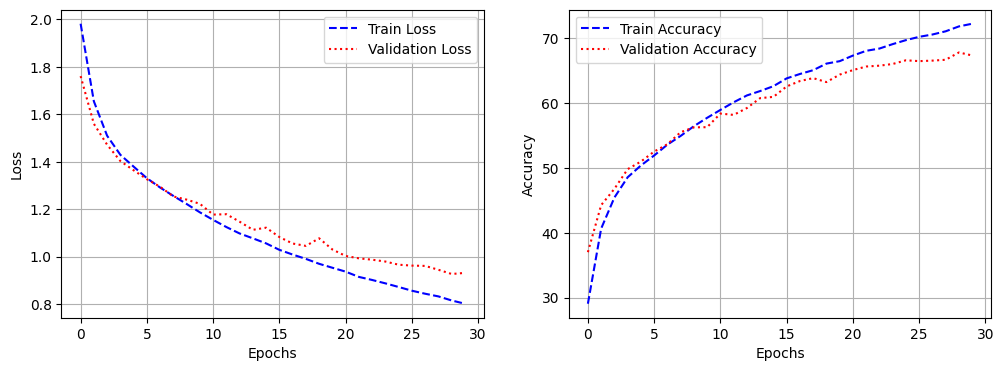

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b--', label='Train Loss')
plt.plot(val_losses, 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'b--', label='Train Accuracy')
plt.plot(val_accuracies, 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f"테스트 정확도: {test_accuracy:.2f}%")

테스트 정확도: 67.71%


### 3.2 모델 구성 및 학습: 과대적합 방지

In [ ]:
class RegularizedCNN(nn.Module):
    def __init__(self):
        super(RegularizedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 2 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model_reg = RegularizedCNN()
print(model_reg)

RegularizedCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): ReLU()
    (16): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): Conv2d(128

- BatchNorm2d를 사용하여 배치 정규화를 수행합니다.
- Dropout 레이어를 사용하여 과대적합을 방지합니다.


### 모델 학습

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_reg.parameters(), lr=1e-4)

epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(1, epochs+1):
    # 훈련 모드
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)

    # 검증 모드
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

Epoch [1/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [2/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [3/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [4/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [5/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [6/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [7/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [8/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [9/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [11/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [12/30], Train Loss: 0.7919, Val Loss: 0.9316, Train Acc: 72.42%, Val Acc: 67.33%
Epoch [13/30], Train Loss: 0.7919, Val Lo

### 학습 결과 시각화

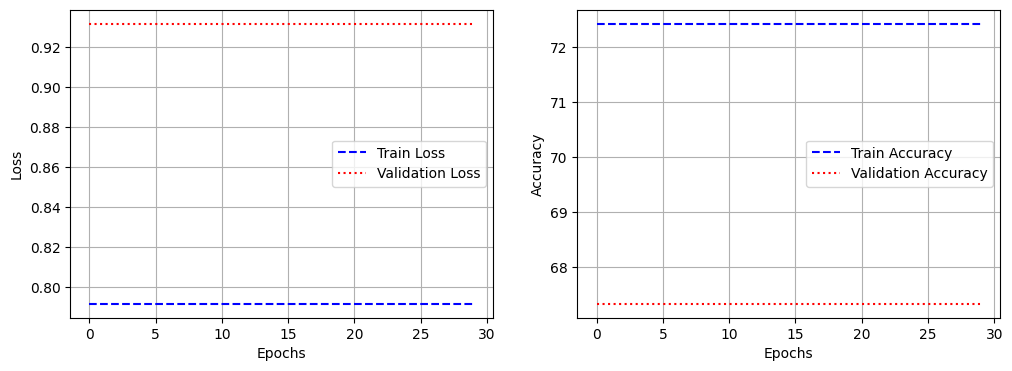

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b--', label='Train Loss')
plt.plot(val_losses, 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'b--', label='Train Accuracy')
plt.plot(val_accuracies, 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f"테스트 정확도: {test_accuracy:.2f}%")

테스트 정확도: 67.71%


## 4. TensorFlow와 PyTorch 구현 비교

- 모델 구조: 두 프레임워크에서 모델의 구조는 거의 동일하게 구현되었습니다.
- 과대적합 방지: 드롭아웃과 배치 정규화를 모두 사용하였습니다.
- 코드 차이점:
    - TensorFlow는 Model과 fit 메서드를 사용하여 간결하게 학습을 진행합니다.
    - PyTorch는 nn.Module을 상속하여 모델을 정의하고, 학습 루프를 직접 작성하여 세밀한 제어가 가능합니다.
- 성능 비교:
    - 두 프레임워크 모두에서 모델의 성능이 향상되었으며, 비슷한 수준의 정확도를 달성하였습니다.
    - 실제 성능은 하이퍼파라미터 설정, 초기화, 데이터셋 분할 등에 따라 약간의 차이가 있을 수 있습니다.

## 5. 결론

- CIFAR-10 데이터셋을 사용하여 TensorFlow와 PyTorch에서 CNN 모델을 구현하고 비교해보았습니다.
- 과대적합 방지 기법을 적용하여 모델의 성능을 향상시켰습니다.
- 두 프레임워크의 코드 구조와 사용법을 비교함으로써 각각의 장단점을 이해할 수 있었습니다.
- 실제 프로젝트에서는 팀의 선호도, 기존 코드베이스, 요구사항에 따라 적절한 프레임워크를 선택하여 사용할 수 있습니다.


## 6. 과제

- 현재 테스트 정확도가 67.36% 입니다.
- 어제 여러분들이 확인 했었던 여러 하이퍼파라미터들을 수정해보시면서 모델에 대한 성능을 개선 시켜 보세요.
- 그리고 해당 기록을 노션 페이지에 업로드 해주세요.